Using cpu device
2.3079581260681152
2.3049254417419434
2.30159068107605
2.3058130741119385
2.300171375274658
2.305809736251831
2.299612522125244
2.2990407943725586
2.2918224334716797
2.296508550643921
2.299675464630127
2.284963846206665
2.2973568439483643
2.2867624759674072
2.289667844772339
2.2893083095550537
2.283369541168213
2.2889907360076904
2.2832388877868652
2.284895181655884
2.283311367034912
2.2815136909484863
2.2758240699768066
2.276581287384033
2.2791566848754883
2.2809770107269287
2.2749738693237305
2.278489589691162
2.276503562927246
2.2722489833831787
2.2659945487976074
2.2673544883728027
2.268688440322876
2.2643041610717773
2.2631747722625732
2.256552219390869
2.2626471519470215
2.2589480876922607
2.2549664974212646
2.2535414695739746
2.2418277263641357
2.2414543628692627
2.2391185760498047
2.23618745803833
2.2270357608795166
2.236743927001953
2.229544162750244
2.226893424987793
2.2300305366516113
2.2314529418945312
2.227983236312866
2.2231462001800537
2.2178311347961426

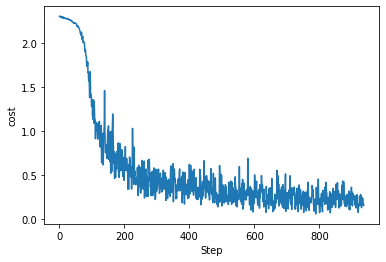

In [1]:
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import numpy as np
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

def data_transform(x):
    x = np.array(x, dtype = 'float32') / 255
    x = x.reshape((-1, ))
    x = torch.from_numpy(x)
    return x

trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)

train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# build model
model = DNN().to(device)

# define cost
criterion = nn.CrossEntropyLoss()

# optimization
optimizer = torch.optim.SGD(model.parameters(), 0.1)
#optimizer = torch.optim.RMSprop(model.parameters(), 0.01, alpha=0.9)
#optimizer = torch.optim.Adam(model.parameters(), 0.01, betas=(0.9, 0.99))

losses = []



for epoch in range(1):
    model.train() 
    for im, label in train_data:
        
        im = im.to(device)
        label = label.to(device)
        pred = model(im)
        
        loss = criterion(pred, label)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        print(loss.item())
        losses.append(loss.item())

plt.xlabel('Step')        
plt.ylabel('cost')
plt.plot(losses)
plt.show()